<a href="https://colab.research.google.com/github/ravilon/ufpel-pdi/blob/main/LAB5_Filtragem_Frequencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB5 — Filtragens no Domínio das Frequências

Disciplina: **Processamento Digital de Imagens (PDI)** – UFPel  
Professor: **Guilherme Corrêa**  

Este notebook tem com foco os conceitos de **filtragens no domínio das frequências** em imagens digitais.

---

## Objetivos  

1. Carregar e visualizar imagens em escala de cinza.
2. Transformar a imagem para o domínio das frequências usando a Transformada Discreta de Fourier (DFT).
3. Transformar a imagem de volta para o domínio espacial com a Transformada Discreta de Fourier Inversa (IDFT).
4. Realizar filtragem para suavização de imagens com filtro passa-baixas.

---

## Bibliotecas úteis
Se estiver no Colab, rode a célula de instalação uma única vez.

In [ ]:
# Se necessário no Colab, descomente a linha abaixo:
#!pip -q install numpy matplotlib scikit-image imageio

In [1]:
# (execute uma vez)
!pip -q install ipywidgets==8.1.2 scikit-image==0.24.0 opencv-python-headless==4.10.0.84
from google.colab import output
output.enable_custom_widget_manager()

import numpy as np
import matplotlib.pyplot as plt
import cv2
from ipywidgets import interact, IntSlider
from skimage import filters, img_as_float


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.6 MB/s eta 0:00:00


## Upload de uma imagem
Usando `files` do `google.colab` para fazer upload de uma imagem.

Faça upload de uma imagem (JPG/PNG).


Saving lena_orig.bmp to lena_orig.bmp


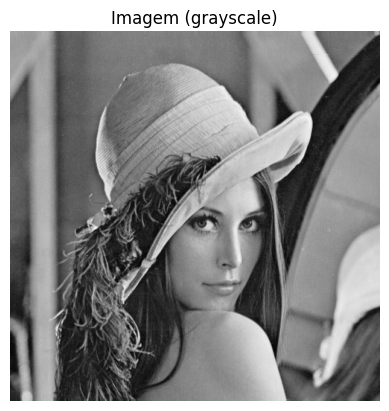

Dimensão: (497, 497)  | dtype: float64


In [3]:
from google.colab import files

print("Faça upload de uma imagem (JPG/PNG).")
up = files.upload()
if not up:
    raise RuntimeError("Nenhum arquivo enviado.")

fname = next(iter(up))
img_bgr = cv2.imdecode(np.frombuffer(up[fname], np.uint8), cv2.IMREAD_COLOR)
if img_bgr is None:
    raise RuntimeError("Falha ao ler a imagem.")

# Converte para cinza e float [0,1]
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img = img_as_float(img_gray)

plt.imshow(img, cmap='gray'); plt.axis('off')
plt.title('Imagem (grayscale)')
plt.show()

print("Dimensão:", img.shape, " | dtype:", img.dtype)


# 🖼️ Tarefa A — Transformar a imagem para o domínio das frequências (DFT)

Você deve:

- Utilizar a imagem em escala de cinza aberta no bloco anterior.
- Calcular a transformada de Fourier bidimensional (DFT) da imagem, utilizando as funções prontas do módulo numpy.fft.
- Centralizar o espectro de frequências com np.fft.fftshift, de modo que as baixas frequências fiquem no centro.
- Alterar o espectro de frequências para escala logarítmica (np.log1p(np.abs(...))) para melhor visualização.
- Mostrar a imagem que representa o espectro de frequências e a imagem que representa o espectro de frequências alterado para a escala logarítmica.

💡 Dicas:
- `np.fft.fft2(img)` transforma a imagem do domínio espacial para o espaço das frequências com a DFT bidimensional
- `np.fft.fftshift()` reorganiza os quadrantes do espectro, movendo a frequência zero para o centro da imagem; isso é apenas uma reordenação para facilitar a visualização e a filtragem radial.
- `np.log1p(np.abs(F))` aplica log para melhor visualização da magnitude do espectro de frequências

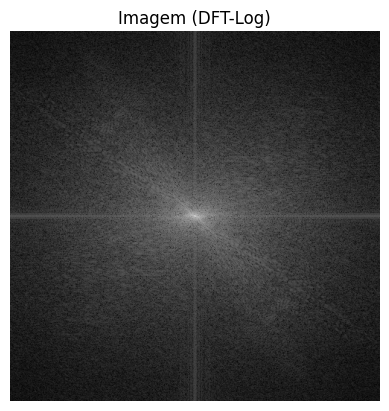

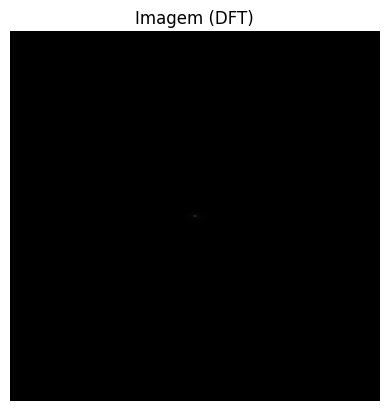

In [15]:
imgDFTLog = np.log1p(np.abs(np.fft.fftshift(np.fft.fft2(img))))
imgDFT = np.abs(np.fft.fftshift(np.fft.fft2(img)))

plt.imshow(imgDFTLog, cmap='gray'); plt.axis('off')
plt.title('Imagem (DFT-Log)')
plt.show()

plt.imshow(imgDFT, cmap='gray'); plt.axis('off')
plt.title('Imagem (DFT)')
plt.show()


# 🖼️ Tarefa B — Transformar a imagem de volta para o domínio espacial (IDFT)

Você deve:

- Utilizar a representação no domínio das frequências do bloco anterior.
- Calcular a transformada de Fourier inversa bidimensional (IDFT) da imagem, utilizando as funções prontas do módulo numpy.fft.
- Descentralizar o espectro de frequências com `np.fft.ifftshift()`, de modo que as baixas frequências voltem ao canto esquerdo superior.
- Mostrar a imagem que representa o espectro de frequências e a imagem que representa o espectro de frequências alterado para a escala logarítmica.

💡 Dicas:
- `np.fft.ifft2(img)` transforma a imagem do domínio das frequências de volta para o dompinio espacial.
- `np.fft.ifftshift()` reorganiza os quadrantes do espectro, movendo a frequência zero de volta para o canto esquerdo superior.

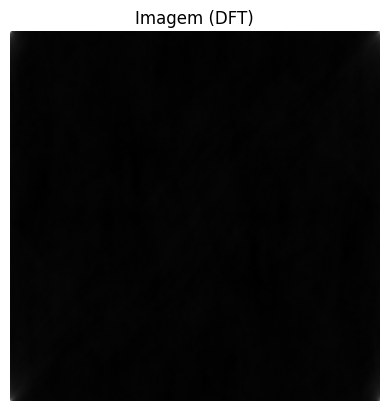

In [17]:
imgIDFT = np.abs(np.fft.ifft2(np.fft.ifftshift(imgDFT)))

plt.imshow(imgIDFT, cmap='gray'); plt.axis('off')
plt.title('Imagem (DFT)')
plt.show()

---
# 🖼️ Tarefa C — Suavização com Filtro Passa-Baixas Ideal

Você deve:

- Aplicar o filtro passa-baixas ideal.
- Mostrar o resultado do filtro passa-baixas no domínio das frequências e no domínio espacial.
- Exercite o valor de D0 para ver o resultado da suavização em diferentes níveis.

In [ ]:
def ideal_lp_mask(shape, D0):
    "Máscara passa-baixa IDEAL 2D (radial)."
    M, N = shape
    u = np.arange(M) - M/2  # reorganiza para que o ponto (0,0) do novo sistema de coordenadas esteja no centro do espectro e não no canto da matriz
    v = np.arange(N) - N/2
    U, V = np.meshgrid(u, v, indexing='ij')
    D = np.sqrt(U**2 + V**2)  # calcula distância euclidiana do centro até o ponto na posição U,V

    # Frequências dentro do raio D0 passam (valor 1), fora são cortadas (valor 0)
    H = np.zeros_like(D)
    H[D <= D0] = 1.0
    return H

# Parâmetro de corte
D0 = 20
H = ideal_lp_mask(img.shape, D0)

# Aplicar a máscara no espectro da imagem (F obtido anteriormente com fft2c)
G = F * H

# Visualização dos resultados
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.title('log(1 + |F|) — Espectro Original')

plt.subplot(1,3,2)
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.title(f'Filtro Passa-Baixa Ideal (D0={D0})')

plt.subplot(1,3,3)
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.title('log(1 + |F·H|) — Espectro Filtrado')


plt.tight_layout()
plt.show()


---
# 🖼️ Tarefa D — Veja o Resultado da Filtragem Passa-Baixas

Você deve:

- Transformar o espectro de frequências filtrado de volta para o domínio espacial com a IFFT.
- Apresentar a imagem filtrada transformada de volta para o domínio espacial.